# Customer Segmentation

Sebuah perusahaan ingin berusaha untuk mengenal lebih baik pelanggan nya. Tujuannya agar perusahaan dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan. Untuk menyelesaikan masalah tersebut terdapat salah satu metode yang bisa dilakukan yaitu melakukan **segmentasi pelanggan**. **Segmentasi Pelanggan** adalah mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut kamu akan menggunakan teknik **clustering***.

**Clustering** adalah proses pembagian objek-objek ke dalam beberapa kelompok atau *cluster* berdasarkan tingkat kemiripan antara satu objek dengan yang lain. Salah satunya teknik *clustering* yang dapat digunakan adalah algoritma **K-Prototypes**, dimana  algoritma **K-Prototypes** merupakan gabungan dari **K-means** dan juga **K-modes**. **K-means** itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan **K-modes**. Untuk dokumentasi lebih lanjut mengenail algoritma K-Prototypes bisa anda lihat [**disini**](https://github.com/nicodv/kmodes).

## Dataset

Dataset yang digunakan dalam pembahasan ini berasal dari [https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt](https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/customer_segments.txt).

Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

- Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
- Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
- Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
- Umur: Umur dari pelanggan dalam format angka
- Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
- Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
- Nilai Belanja Setahun: Merupakan total belanja yang sudah di keluarkan oleh pelanggan tersebut.

## Library

Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:

- Pandas, di gunakan untuk melakukan pemrosesan analisis data
- Matplotlib, di gunakan sebagai dasar untuk melakukan visualisasi data
- Seaborn, di gunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
- Scikit-Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
- Kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
- Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.

Library **kmodes** harus dinstall terlebih dahulu dengan cara berikut.

In [1]:
# Install kmodes
!pip install kmodes

In [2]:
# Load library
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import StandardScaler  
from sklearn.preprocessing import LabelEncoder  
  
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes  
  
import pickle  
from pathlib import Path 

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

Melakukan pembacaan dataset ke dalam bentuk dataframe, kemudian melihat preview data dan informasi data yang terbaca.

In [3]:
# Load file into dataframe 
df = pd.read_csv("data/customer_segments.txt", sep="\t")  
  
# Print first five rows
df.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206


In [4]:
# View info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


Terlihat tidak ditemukan *missing values* dan *wrong format*.

## Exploratory Data Analysis

Proses eksplorasi data bisa berupa **univariate** maupun **multivariate**. **Univariate Analysis** melihat karakteristik tiap-tiap feature, misal nya dengan melihat statistik deskriptif, membuat histogram, kdeplot, count plot maupun boxplot. Sedangkan untuk **Multivariate Analysis**, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi matrix, melihat predictive power, cross tabulasi, dan lainnya. Disini kita akan melakukan *univariate analysis* terhadap kolom bertipe numerik dan kategorik.

**EDA Numerical Data**

Melakukan analisa distribusi data pada kolom bertipe numerik dengan menggunakan visualisasi **boxplot** dan **histogram**. Kolom yang bertipe numerik adalah `Umur` dan `NilaiBelanjaSetahun`.

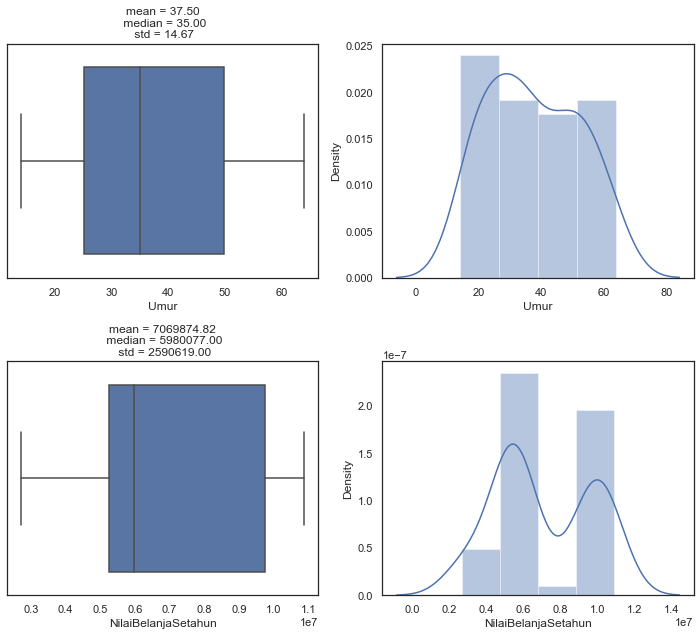

In [5]:
# Setting canvas
sns.set(style='white')
  
# Function plotting numerical data
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
        sns.boxplot(df[kol], ax = axs[i][0])
        sns.distplot(df[kol], ax = axs[i][1])   
        axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%
                         (df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.tight_layout()
    plt.show()  

# Apply function
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik) 

**EDA Categorical Data**

Melakukan analisa distribusi data pada kolom bertipe kategorik dengan menggunakan visualisasi **count plot**. Kolom yang bertipe kategorik yaitu `Jenis Kelamin`, `Profesi` dan `Tipe Residen`.

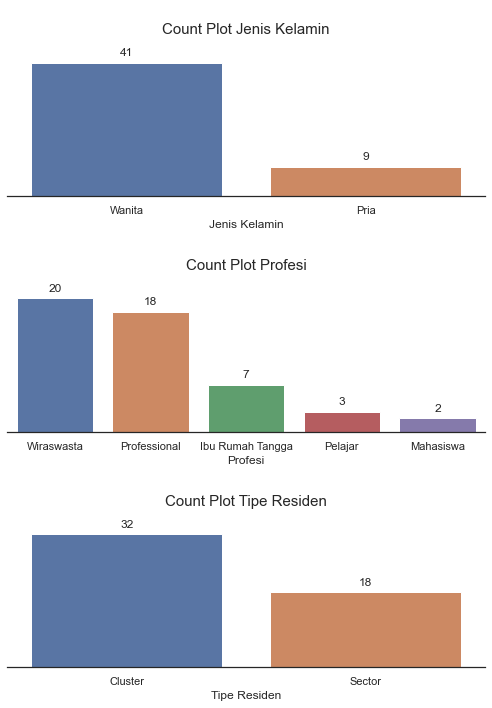

In [6]:
# Define categorical column
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Setting canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Plotting categorical data 
for i, kol in enumerate(kolom_kategorikal):  
    # Plotting data
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Create annotate  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False)
    plt.tight_layout()

plt.show()

Berdasarkan hasil visualisasi diatas diketahui bahwa:

- Rata-rata dari umur pelanggan adalah 37.5 tahun.
- Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82.
- Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%).
- Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%).
- Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sector.

## Preprocessing Data

Setiap machine learning model memiliki karakteristik yang berbeda-beda. Hal ini membuat kita harus mempersiapkan data yang dimiliki sebelum digunakan untuk melakukan permodelan sehingga dapat menyesuaikan dengan karakteristik yang dimiliki oleh tiap model dan mendapatkan hasil yang optimal.

Kita akan melakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan di gunakan adalah **K-Prototypes**. Salah satu faktor utama dalam algoritma ini adalah perlu menggunakan data yang skala antar variabel nya setara. Selain itu kita juga perlu melakukan pengkodean kolom-kolom kategorikal yang di miliki menjadi numerik.

**Standardization**

Tujuannya adalah agar data pada kolom bertipe numerik yang memiliki skala besar tidak mendominasi bagaimana cluster akan di bentuk dan juga tiap kolom akan dianggap sama pentingnya oleh algoritma yang akan digunakan.

In [7]:
# Define numerical columns 
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
# Statistics before standardization 
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardization 
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Statistics after standardization
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0)) 
# Print the result 
df_std.head()

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


,Umur,NilaiBelanjaSetahun
0,1.411245,0.946763
1,-1.617768,-1.695081
2,0.722833,-0.695414
3,1.067039,-0.727361
4,0.240944,1.382421


**Label Encoding**

Merubah data pada kolom bertipe kategorikal menjadi angka dengan menggunakan salah satu fungsi dari **sklearn** yaitu `LabelEncoder`. Sebagai contoh untuk kolom **Jenis Kelamin**, data bernilai "Pria" akan diubah menjadi angka 0 dan "Wanita" akan di rubah menjadi angka 1.

In [8]:
# Define categorical columns  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
# Encoding categorical data 
df_encode = df[kolom_kategorikal].copy()   
for col in kolom_kategorikal:  
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])
      
# Print the result 
df_encode.head()

,Jenis Kelamin,Profesi,Tipe Residen
0,0,4,1
1,1,2,0
2,0,3,0
3,0,3,0
4,1,4,0


**Joining Dataframe**

Hasil data dari proses **standardization** yaitu `df_std` dan proses **label encoding** yaitu `df_encode` akan digabung menjadi dataframe baru.

In [9]:
# Concatenate dataframe
df_model = pd.concat([df_encode, df_std], axis=1)
 
# Print new rows data
df_model.head()

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,1,1.411245,0.946763
1,1,2,0,-1.617768,-1.695081
2,0,3,0,0.722833,-0.695414
3,0,3,0,1.067039,-0.727361
4,1,4,0,0.240944,1.382421


Hasil diatas adalah preview data setelah dilakukan **preprocessing data.**

## K-Prototypes Clustering

**Elbow Plot**

Salah satu parameter penting yang harus dimasukkan pada algoritma **K-Prototypes** adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan **Elbow Plot**. Caranya dengan memvisualisasikan total jarak seluruh data kita ke pusat cluster nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster optimal kita.

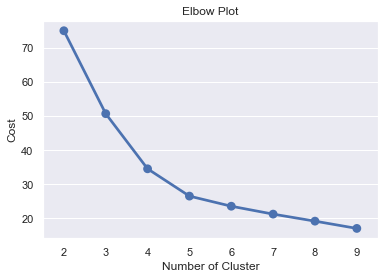

In [10]:
# Looping cost values using K-Prototypes  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes (n_clusters = k, random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost[k]= kproto.cost_

# Create elbow plot
sns.set_style('darkgrid')
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))
plt.title('Elbow Plot')
plt.xlabel('Number of Cluster')
plt.ylabel('Cost')
plt.show()

Terlihat pada **jumlah cluster = 5** adalah titik siku yang terbentuk dan akan digunakan sebagai jumlah cluster optimal untuk membuat model *clustering* kita. Model yang terbentuk akan disimpan yang nantinya akan digunakan kembali untuk memprediksi data baru.

In [11]:
# Setting n_clusters = 5
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
# Save Model  
pickle.dump(kproto, open('data/cluster.pkl', 'wb'))  

Selanjutnya melakukan prediksi terhadap data yang sudah dilakukan **preprocessing** kemudian menggabungkan dengan data asli nya.

In [12]:
# Predict cluster
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Add cluster data into raw data    
df_final = df.copy()    
df_final['Cluster'] = clusters
df_final.head()

segmen pelanggan: [1 2 4 4 0 3 1 4 3 3 4 4 1 1 0 3 3 4 0 2 0 4 3 0 0 4 0 3 4 4 2 1 2 0 3 0 3
 1 3 2 3 0 3 0 3 0 4 1 3 1]



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0


Kita bisa melakukan segmentasi data pelanggan berdasarkan kelompok atau *cluster* nya

In [13]:
# Segmentation customer data by cluster 
for i in range(len(df_final['Cluster'].unique())):  
    print('Pelanggan cluster: {}'.format(i))  
    display(df_final[df_final['Cluster']== i])
    print('\n')

Pelanggan cluster: 0


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0
14,CUST-015,Shirley Ratuwati,Wanita,20,Wiraswasta,Cluster,10365668,0
18,CUST-019,Mega Pranoto,Wanita,32,Wiraswasta,Cluster,10884508,0
20,CUST-021,Lestari Fabianto,Wanita,38,Wiraswasta,Cluster,9222070,0
23,CUST-024,Putri Ginting,Wanita,39,Wiraswasta,Cluster,10259572,0
24,CUST-025,Julia Setiawan,Wanita,29,Wiraswasta,Sector,10721998,0
26,CUST-027,Grace Mulyati,Wanita,35,Wiraswasta,Cluster,9114159,0
33,CUST-034,Deasy Arisandi,Wanita,21,Wiraswasta,Sector,9759822,0
35,CUST-036,Ni Made Suasti,Wanita,30,Wiraswasta,Cluster,9678994,0
41,CUST-042,Yuliana Wati,Wanita,26,Wiraswasta,Cluster,9880607,0




Pelanggan cluster: 1


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1
6,CUST-007,"Cahyono, Agus",Pria,64,Wiraswasta,Sector,9837260,1
12,CUST-013,Cahaya Putri,Wanita,64,Wiraswasta,Cluster,9333168,1
13,CUST-014,Mario Setiawan,Pria,60,Wiraswasta,Cluster,9471615,1
31,CUST-032,Chintya Winarni,Wanita,47,Wiraswasta,Sector,10663179,1
37,CUST-038,Agatha Salim,Wanita,46,Wiraswasta,Sector,10477127,1
47,CUST-048,Maria Hutagalung,Wanita,45,Wiraswasta,Sector,10390732,1
49,CUST-050,Lianna Nugraha,Wanita,55,Wiraswasta,Sector,10569316,1




Pelanggan cluster: 2


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2
19,CUST-020,Irene Novianto,Wanita,16,Pelajar,Sector,2896845,2
30,CUST-031,Eviana Handry,Wanita,19,Mahasiswa,Cluster,3042773,2
32,CUST-033,Cecilia Kusnadi,Wanita,19,Mahasiswa,Cluster,3047926,2
39,CUST-040,Irene Darmawan,Wanita,14,Pelajar,Sector,2861855,2




Pelanggan cluster: 3


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster
5,CUST-006,Rosalina Kurnia,Wanita,24,Professional,Cluster,5215541,3
8,CUST-009,Elisabeth Suryadinata,Wanita,29,Professional,Sector,5993218,3
9,CUST-010,Mario Setiawan,Pria,33,Professional,Cluster,5257448,3
15,CUST-016,Bambang Rudi,Pria,35,Professional,Cluster,5262521,3
16,CUST-017,Yuni Sari,Wanita,32,Ibu Rumah Tangga,Cluster,5677762,3
22,CUST-023,Denny Amiruddin,Pria,34,Professional,Cluster,5239290,3
27,CUST-028,Adeline Huang,Wanita,40,Ibu Rumah Tangga,Cluster,6631680,3
34,CUST-035,Ida Ayu,Wanita,39,Professional,Sector,5962575,3
36,CUST-037,Felicia Tandiono,Wanita,25,Professional,Sector,5972787,3
38,CUST-039,Gina Hidayat,Wanita,20,Professional,Cluster,5257775,3




Pelanggan cluster: 4


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4
7,CUST-008,Danang Santosa,Pria,52,Professional,Cluster,5223569,4
10,CUST-011,Maria Suryawan,Wanita,50,Professional,Sector,5987367,4
11,CUST-012,Erliana Widjaja,Wanita,49,Professional,Sector,5941914,4
17,CUST-018,Nelly Halim,Wanita,63,Ibu Rumah Tangga,Cluster,5340690,4
21,CUST-022,Novita Purba,Wanita,52,Professional,Cluster,5298157,4
25,CUST-026,Christine Winarto,Wanita,55,Professional,Cluster,5269392,4
28,CUST-029,Tia Hartanti,Wanita,56,Professional,Cluster,5271845,4
29,CUST-030,Rosita Saragih,Wanita,46,Ibu Rumah Tangga,Sector,5020976,4


Selain itu kita juga melakukan visualisasi untuk melihat persebaran data hasil *clustering* agar dapat mempermudah melakukan penamaan di tiap-tiap cluster.

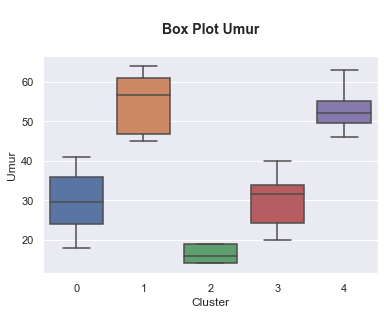

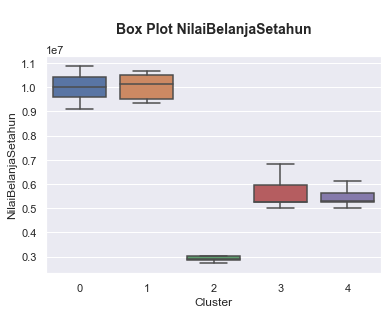

In [14]:
# Plotting distribution numerical data by cluster
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'Cluster',y = i, data = df_final)  
    plt.title ('\nBox Plot {}\n'.format(i), fontsize=14, fontweight='bold')  
    plt.show() 

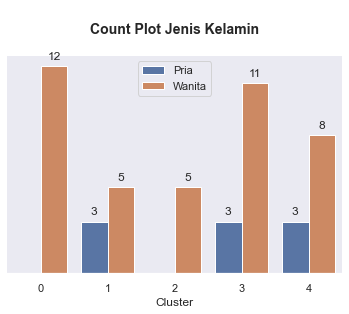

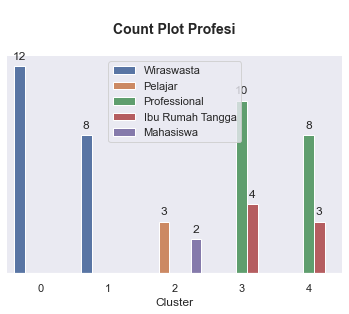

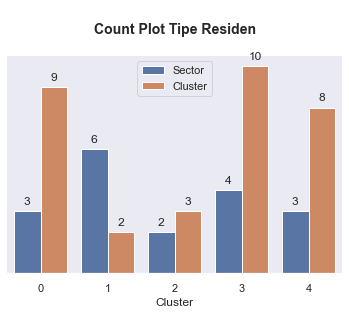

In [15]:
# Plotting distribution categorical data by cluster
for i in kolom_kategorikal:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'Cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=14, fontweight='bold')  
    ax.legend(loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show() 

Berdasarkan hasil visualisasi tersebut maka data pelanggan akan dikelompokkan sebagai berikut:
- **Cluster 0: Diamond Young Entrepreneur**, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.
- **Cluster 1: Diamond Senior Entrepreneur**, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.
- **Cluster 2: Silver Students**, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.
- **Cluster 3: Gold Young Member**, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.
- **Cluster 4: Gold Senior Member**, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.

In [16]:
# Create segment cluster 
df_final['Segment'] = df_final['Cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

df_final.head()

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster,Segment
0,CUST-001,Budi Anggara,Pria,58,Wiraswasta,Sector,9497927,1,Diamond Senior Member
1,CUST-002,Shirley Ratuwati,Wanita,14,Pelajar,Cluster,2722700,2,Silver Member
2,CUST-003,Agus Cahyono,Pria,48,Professional,Cluster,5286429,4,Gold Senior Member
3,CUST-004,Antonius Winarta,Pria,53,Professional,Cluster,5204498,4,Gold Senior Member
4,CUST-005,"Ibu Sri Wahyuni, IR",Wanita,41,Wiraswasta,Cluster,10615206,0,Diamond Young Member


Hasil diatas adalah preview data setelah dilakukan penamaan segmen data pelanggan.

## Predicting New Customer

Berdasarkan model yang telah dibuat sebelumnya kita akan menguji jika terdapat data pelanggan baru yang masuk. Sama seperti sebelumnya data baru akan dilakukan *preprocessing* terlebih dahulu.

**Preprocessing New Data**

Melakukan proses standarisasi untuk kolom numerik dan pengkodean label untuk kolom kategorikal.

In [17]:
# Create new data 
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
 
new_data = pd.DataFrame(data)  
new_data

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


In [20]:
# Create function preprocessing data
def preprocessing_data(new_data):  
    # Encoding categorical data
    kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']
    encode_data = new_data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    encode_data['Jenis Kelamin'] = encode_data['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })        
    ## Profesi  
    encode_data['Profesi'] = encode_data['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })    
    ## Tipe Residen  
    encode_data['Tipe Residen'] = encode_data['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardization numerical data
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    scale_data = new_data[kolom_numerik].copy()  
      
    ## Umur  
    scale_data['Umur'] = (scale_data['Umur'] - 37.5)/14.7        
    ## Nilai Belanja Setahun  
    scale_data['NilaiBelanjaSetahun'] = (scale_data['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Joining categorical and numerical data
    model_data = pd.concat([encode_data, scale_data], axis=1)
     
    return model_data 
  
# Preprocessing new data 
fix_data = preprocessing_data(new_data)  
fix_data

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,0,0.510204,0.447818


Setelah melakukan *preprocessing* terhadap data baru, maka selanjutnya memprediksi data tersebut termasuk dalam cluster mana atau segmen apa.

In [21]:
# Function clustering new data
def clustering_data(new_data):       
    # Open Model  
    model = pickle.load(open('data/cluster.pkl', 'rb'))        
    # Predict new data
    pred = model.predict(new_data, categorical=[0,1,2])  
      
    return pred  

In [22]:
# Function segmentation new data
def segmentation(new_data, pred_cluster):     
    # Add cluster to new column
    new_data['Cluster'] = pred_cluster
      
    # Choosing Segment
    new_data['Segment'] = new_data['Cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return new_data

In [23]:
# Predicting new customer
pred_cluster = clustering_data(fix_data) 
result = segmentation(new_data, pred_cluster)  
result

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun,Cluster,Segment
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000,1,Diamond Senior Member


Hasil diatas adalah prediksi cluster atau segmen data pelanggan baru.